# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

airb_df = pd.read_csv('/airbnb_hw.csv')

#1------------------------------------------------------------------------------

#understand variable + learn how dirty the data is:
print(airb_df['Price'].unique(), '\n')
print(airb_df['Price'].value_counts(), '\n')
print(airb_df['Price'].hist(), '\n')

#get rid of commas in values > 1000 and turn into numeric variable
airb_df['Price'] = pd.to_numeric(airb_df['Price'], errors='coerce')
print(airb_df['Price'].unique(), '\n')

#missing data
airb_df['Price_na'] = airb_df['Price'].isnull()
print(airb_df['Price_na'].value_counts(), '\n')
#181 values missing
#-------------------------------------------------------------------------------

#2------------------------------------------------------------------------------
sub_injury_df = pd.read_csv('/mn_police_use_of_force.csv')
#cleaning
print(sub_injury_df['subject_injury'].unique(), '\n')
sub_injury_df['subject_injury'] = sub_injury_df['subject_injury'].replace(' ',np.nan)
print(sub_injury_df['subject_injury'].value_counts(), '\n')
#cross tabulate
pd.crosstab(sub_injury_df['subject_injury'], sub_injury_df['force_type'])
# there are always subject injuries with a baton( No is 0) and no subject injuries
# with a firearm (Yes is 0).
#-------------------------------------------------------------------------------

#3------------------------------------------------------------------------------
justice_df = pd.read_parquet('/justice_data.parquet')
#rename long variable
justice_df = justice_df.rename(columns = {'WhetherDefendantWasReleasedPretrial': "PretrialRelease"})
justice_df.loc[justice_df['PretrialRelease'] == 'Unknown', 'PretrialRelease'] = np.nan
print(justice_df['PretrialRelease'].value_counts(), '\n')
#-------------------------------------------------------------------------------

#4------------------------------------------------------------------------------
#rename long variable
justice_df = justice_df.rename(columns = {'ImposedSentenceAllChargeInContactEvent': 'ImposedSentence'})
print(justice_df['ImposedSentence'].value_counts(), '\n') #9053 null
justice_df['ImposedSentence'] = justice_df['ImposedSentence'].replace(' ',np.nan)
#cross tabulating w/SentenceTypeAllChargesAtConvictionInContactEvent
pd.crosstab(justice_df['ImposedSentence'], justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'])
#-------------------------------------------------------------------------------








PretrialRelease
1.0    19154
0.0     3801
9.0       31
Name: count, dtype: int64 

ImposedSentence
                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
11.9055441478439       1
35.0061601642711       1
46.6242299794661       1
81.0225872689938       1
202                    1
Name: count, Length: 484, dtype: int64 



SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2
ImposedSentence,,,
.0328542094455852,0,6,0
.0657084188911704,3,21,0
.0985626283367557,2,6,0
.131416837782341,4,10,0
.164271047227926,26,33,0
...,...,...,...
98,0,0,1
98.95687885,0,0,1
99,0,1,0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object') 

[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915.

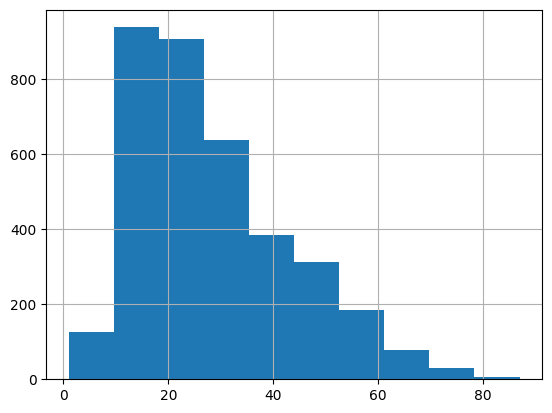

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#1
shark_attacks_df = pd.read_excel('GSAF5.xls')
print(shark_attacks_df.columns, '\n')

#2
for column in shark_attacks_df.columns:
    if shark_attacks_df[column].isnull().all():
        shark_attacks_df = shark_attacks_df.drop(column, axis=1)
#3
shark_attacks_df['Year'] = pd.to_numeric(shark_attacks_df['Year'], errors='coerce')
print(shark_attacks_df['Year'].unique(), '\n')
shark_attacks_df = shark_attacks_df[shark_attacks_df['Year'] >= 1940]
print(shark_attacks_df['Year'].unique(), '\n')
pd.crosstab(shark_attacks_df['Year'], shark_attacks_df['Type'])
#they are increasing over time

#4
shark_attacks_df['Age'] = pd.to_numeric(shark_attacks_df['Age'], errors='coerce')
shark_attacks_df['Age'].hist()

#5
shark_attacks_df['Sex'].value_counts()
#4328 of the victims are male, about 85%

#6
shark_attacks_df= shark_attacks_df.loc[shark_attacks_df['Type'].isin(['Unprovoked', 'Provoked', 'Unknown'])]
shark_attacks_df['Type'].value_counts()

#7
shark_attacks_df= shark_attacks_df.loc[shark_attacks_df['Fatal Y/N'].isin(['Y', 'N', 'UNKNOWN'])]
print(shark_attacks_df['Fatal Y/N'].value_counts())

#8
pd.crosstab(shark_attacks_df['Sex'], shark_attacks_df['Type'])
#more likely to launch unprovoked attacks on men
pd.crosstab(shark_attacks_df['Fatal Y/N'], shark_attacks_df['Type'])
#more fatal when unprovoked
pd.crosstab(shark_attacks_df['Fatal Y/N'], shark_attacks_df['Sex'])
#more fatal when male
#i am okay with sharks (probably)

#9
shark_attacks_df['Species '] = shark_attacks_df['Species '].str.split()
print(shark_attacks_df['Species '].value_counts())
#129 white sharks were recorded